In [1]:
################################
#####1. Load functions/data#####
###############################
#Load the TREBLE functions
source("TREBLE_walkthrough_functions_051920.R")

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [2]:
#Load velocity/feature data
vel = readRDS("sample_correlated_random_walk_velocities_5ksteps.RDS")

In [3]:
##############################################
#####2. Empirically determine window size#####
##############################################
##Behavior space creation depends on choosing a window size for extracting parameters
##Below is code for emprically exploring the relationship between window sizes and the variance and temporal
##properties of behavior space

#Choose a range of window sizes to test (here from 1 frame to 50 with a step size of 5)
toSweep = c(1, seq(5, 50, 5))

#Initialize list to save results from iterative_umap
iterative_windows = list()

[1] "Getting windows"
[1] "Running UMAP"
[1] "umap 1 out of 10"
[1] "umap 2 out of 10"
[1] "umap 3 out of 10"
[1] "umap 4 out of 10"
[1] "umap 5 out of 10"
[1] "umap 6 out of 10"
[1] "umap 7 out of 10"
[1] "umap 8 out of 10"
[1] "umap 9 out of 10"
[1] "umap 10 out of 10"


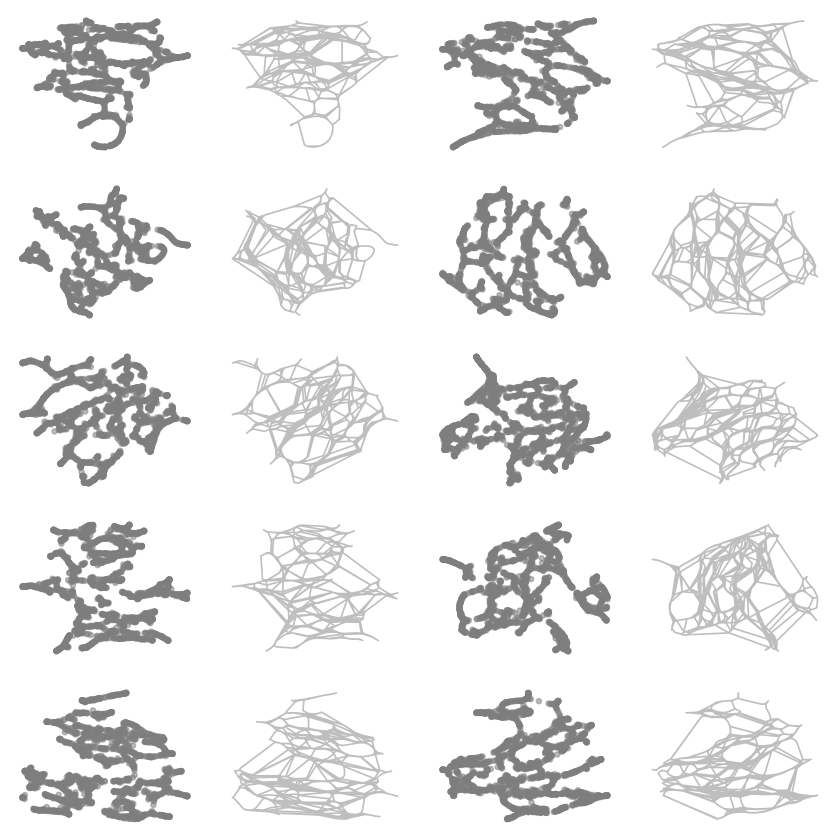

In [4]:
##'iterative_umap' is a function that takes the feature data, extracts windows of a given size for all
##trial/individual/replicate, and creates a behavior space for each
#Below is a sample run for a single window size
sample = iterative_umap(lapply(vel, function(x) x[1:2000,]),
               velocity_windows = TRUE,
               plot = TRUE,
               window_size = toSweep[1])

In [5]:
#Running iterative windows across windows to be swept and saving results
#for(i in 1:length(toSweep)){
#  
#  #Counter
#  print(paste("Window size ", toSweep[i], '; ', i, ' out of ', length(toSweep), sep = ''))
#  
#  #Function
#  iterative_windows[[as.character(toSweep[i])]] = iterative_umap(lapply(vel, function(x) x[1:2000,]),
#                                                                 velocity_windows = TRUE,
#                                                                 window_size = toSweep[i])}

In [6]:
#Save
#saveRDS(iterative_windows, 'sample_correlated_random_walk_iterative_windows.RDS')

In [7]:
#Load
iterative_windows = readRDS('sample_correlated_random_walk_iterative_windows.RDS')

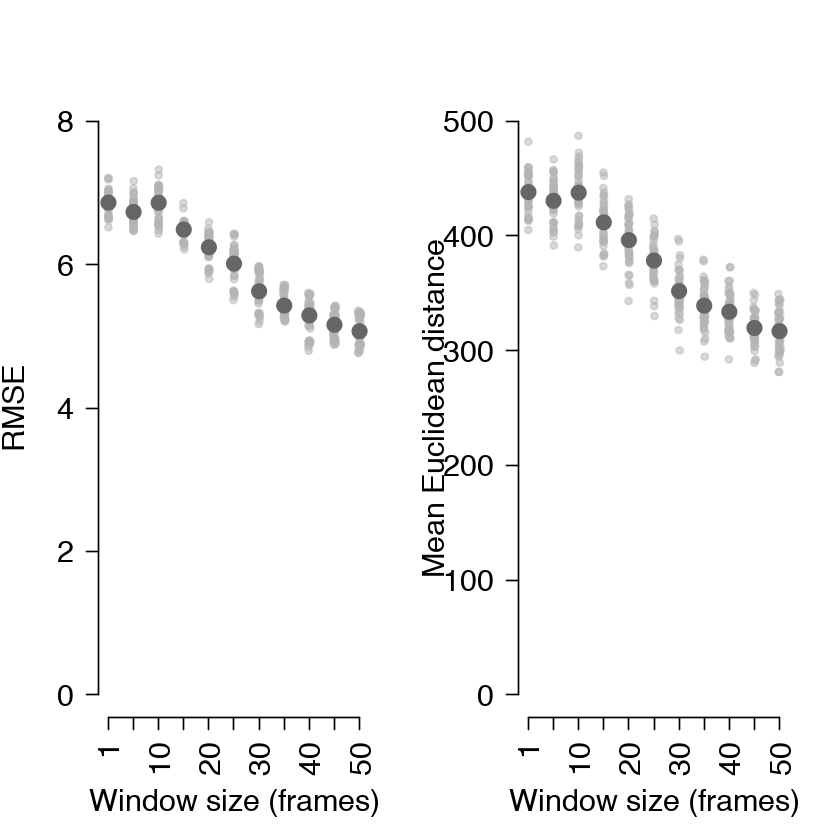

In [8]:
##Structural variation of the behavior spaces produced by 'iterative_windows' 
##can be explored using distance masures.
#Calculate Procrustes and Euclidean distance of results
iterative_windows_pr = lapply(iterative_windows, function(y) run_procrustes(y$umaps)$procrustes)
iterative_windows_dist = lapply(iterative_windows, function(y) run_procrustes(y$umaps)$euclidean_distances)

#Plot
par(mfrow = c(1,2))
plot_results(iterative_windows_pr,
             ylim = c(0, 8),
             ylab = "RMSE",
             xlab = "Window size (frames)")
plot_results(iterative_windows_dist,
             ylim = c(0, 500),
             ylab = "Mean Euclidean distance",
             xlab = "Window size (frames)")

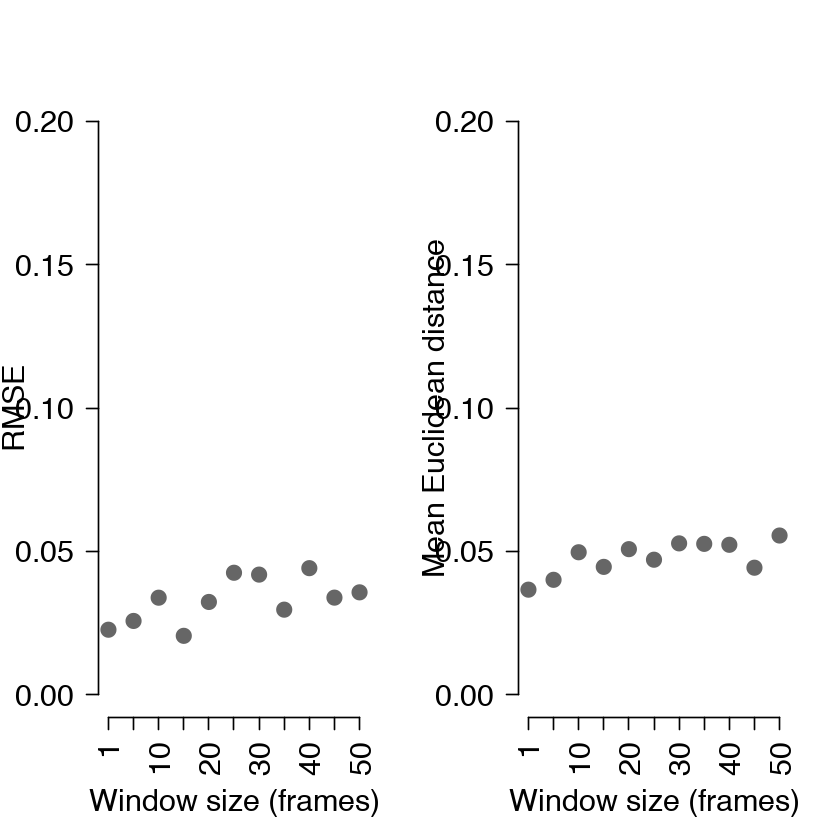

In [9]:
##Since the mean values of the distance measures vary a bit it might be useful to also visualize
##the distance measures as variance controlling for the mean (i.e. dividing variance by the mean)
#Plot variance 
par(mfrow = c(1,2))
plot_variance(iterative_windows_pr,
              ylim = c(0, 0.2),
              ylab = "RMSE",
              xlab = "Window size (frames)")
plot_variance(iterative_windows_dist,
              ylim = c(0, 0.2),
              ylab = "Mean Euclidean distance",
              xlab = "Window size (frames)")

In [10]:
##The spaces produced by 'iterative_windows' may also possess different temporal properties
##based on window size
##A temporal property that might be of concern is the amount of recurrence in a given space, reflecting
##how stereotyped/periodic paths are through the space
#Calculate recurrence across all window sizes
#recurrence = list()
#for(i in 1:length(iterative_windows)){
#  recurrence[[as.character(names(iterative_windows)[i])]] = calculate_recurrence(iterative_windows[[i]]$umaps,
#                                                                                 n_bins = 16)}

In [11]:
#Save
#saveRDS(recurrence, 'sample_correlated_random_walk_iterative_windows_recurrence.RDS')

In [12]:
#Load
recurrence = readRDS('sample_correlated_random_walk_iterative_windows_recurrence.RDS')

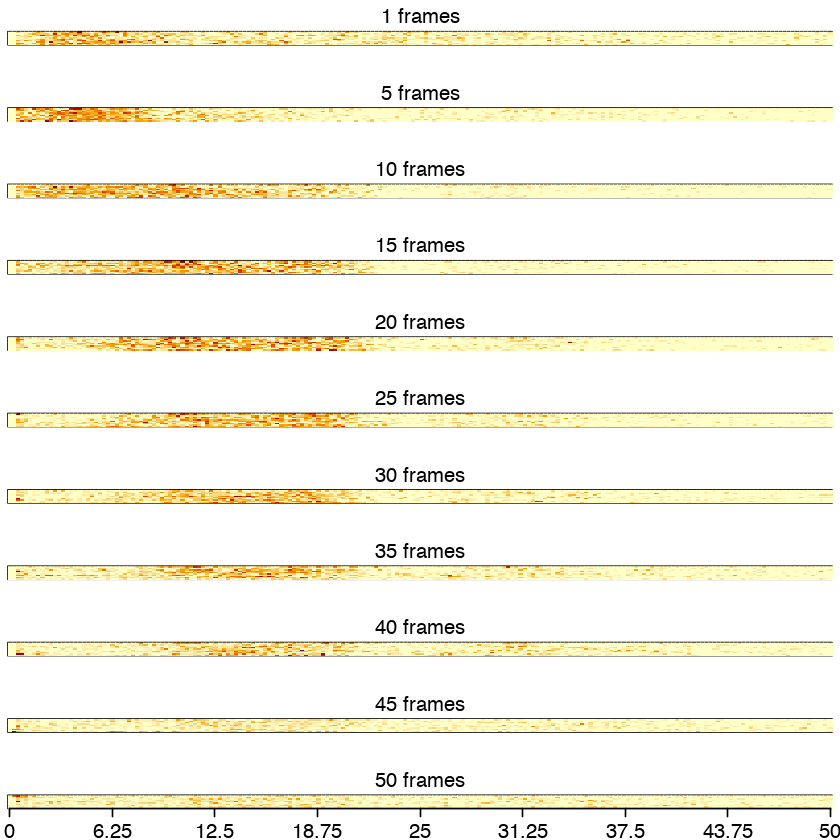

In [13]:
##Below is a function for plotting the results of 'calculate_recurrence'
##Recurrence is visualized using a heatmap for each window size, the rows of which correspond
##to replicate behavior spaces
##The heatmap is colored by the proportion of bins in the space that return to each bin after a previous visit
##The x-axis corresponds to time after the previous visit
#Plot recurrence
plot_recurrence(recurrence)

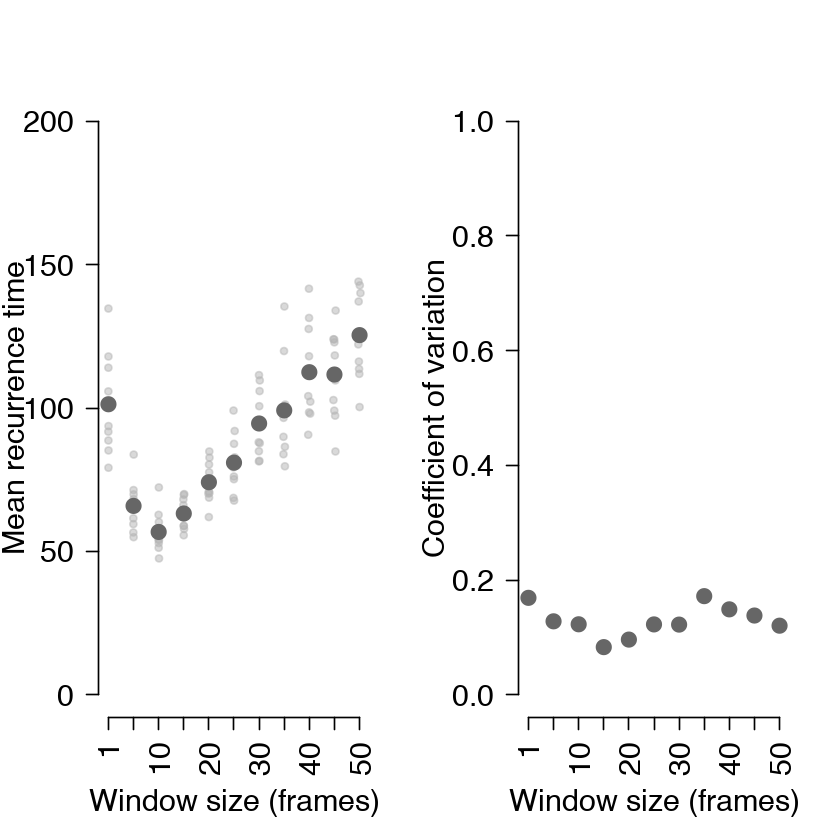

In [14]:
#Plot mean recurrence times by window size
means = lapply(recurrence, function(x) unlist(lapply(x, function(y) (mean(y$recurrences)))))

par(mfrow = c(1,2))
plot_results(means,
             xlab = "Window size (frames)",
             ylab = "Mean recurrence time",
             ylim = c(0,200))

plot_variance(means,
              xlab = "Window size (frames)",
              ylab = "Coefficient of variation",
              ylim = c(0,1))

In [15]:
##################################################
#####Get windows of desired size and run UMAP#####
##################################################
##Given the above analyses it looks like a window size of 15 frames may be a reasonable
##tradeoff between recurrence and structural variability
#Extract windows of size 15 frames
windows = list()
for(i in 1:length(vel)){
  print(paste('replicate', i, 'out of', length(vel)))
  windows[[as.character(i)]] = get_velocity_windows(vel[[i]],
                                                    window_size = 15, 
                                                    name = paste('replicate_', i, sep = ''))}

[1] "replicate 1 out of 10"
[1] "replicate 2 out of 10"
[1] "replicate 3 out of 10"
[1] "replicate 4 out of 10"
[1] "replicate 5 out of 10"
[1] "replicate 6 out of 10"
[1] "replicate 7 out of 10"
[1] "replicate 8 out of 10"
[1] "replicate 9 out of 10"
[1] "replicate 10 out of 10"


In [16]:
#Combine windows
windows = do.call(cbind, windows)

In [17]:
#Save
#saveRDS(windows, 'sample_correlated_random_walk_windows.RDS')

In [18]:
#Run UMAP
u = umap(t(windows),
         verbose = TRUE)

[2020-05-21 13:43:30]  starting umap

[2020-05-21 13:43:30]  creating graph of nearest neighbors

[2020-05-21 13:45:49]  creating initial embedding

[2020-05-21 13:45:59]  optimizing embedding

[2020-05-21 13:45:59]  epoch: 1

[2020-05-21 13:45:59]  epoch: 2

[2020-05-21 13:46:00]  epoch: 3

[2020-05-21 13:46:00]  epoch: 4

[2020-05-21 13:46:01]  epoch: 5

[2020-05-21 13:46:02]  epoch: 6

[2020-05-21 13:46:02]  epoch: 7

[2020-05-21 13:46:03]  epoch: 8

[2020-05-21 13:46:04]  epoch: 9

[2020-05-21 13:46:04]  epoch: 10

[2020-05-21 13:46:05]  epoch: 11

[2020-05-21 13:46:06]  epoch: 12

[2020-05-21 13:46:06]  epoch: 13

[2020-05-21 13:46:07]  epoch: 14

[2020-05-21 13:46:08]  epoch: 15

[2020-05-21 13:46:08]  epoch: 16

[2020-05-21 13:46:09]  epoch: 17

[2020-05-21 13:46:10]  epoch: 18

[2020-05-21 13:46:10]  epoch: 19

[2020-05-21 13:46:11]  epoch: 20

[2020-05-21 13:46:12]  epoch: 21

[2020-05-21 13:46:12]  epoch: 22

[2020-05-21 13:46:13]  epoch: 23

[2020-05-21 13:46:14]  epoch: 24


In [19]:
#Extract layout
layout = data.frame(x = u$layout[,1],
                    y = u$layout[,2],
                    individual = paste(unlist(lapply(strsplit(colnames(windows), "_"), function(v){v[3]})),
                                       unlist(lapply(strsplit(colnames(windows), "_"), function(v){v[4]})),
                                       sep= ''),
                    time = unlist(lapply(strsplit(colnames(windows), "_"), function(v){v[1]})))

In [20]:
#Bin
layout = bin_umap(layout,
                  n_bins = 32)$layout

In [21]:
#Save
#saveRDS(layout, 'sample_correlated_random_walk_UMAP_layout.RDS')

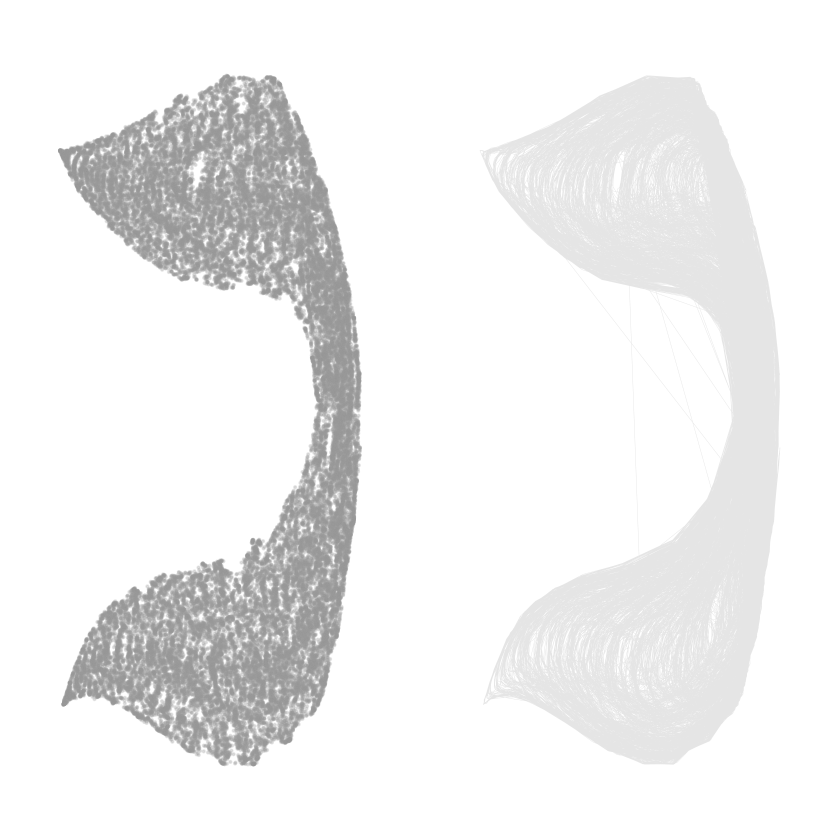

In [22]:
########################
#####Analyzing UMAP#####
########################
##Plot layout as points and lines
par(mfrow = c(1,2), bty = 'n', xaxt = 'n', yaxt = 'n', mar = c(2,2,2,2))

#Points
plot(layout[,1:2],
     pch = 20,
     cex = 0.25,
     xlab = '',
     ylab = '',
     col = alpha('gray60', 0.25))

#Lines
plot(layout[,1:2],
     type = 'l',
     lwd = 0.25,
     xlab = '',
     ylab = '',
     col = alpha('gray60', 0.25))

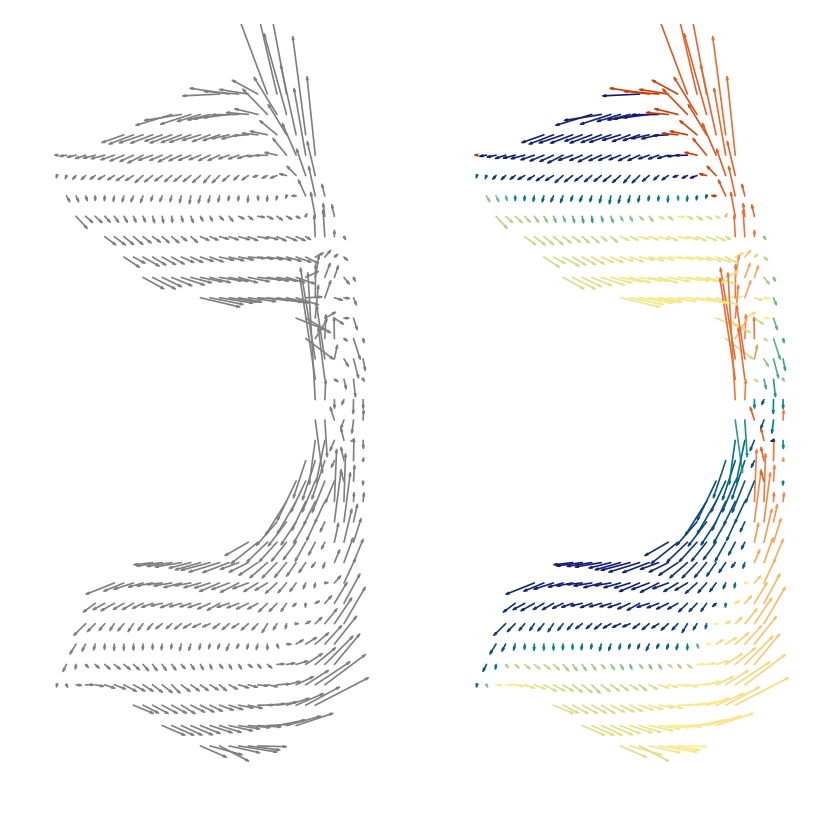

In [23]:
##Plot layout as vector field
par(mfrow = c(1,2), bty = 'n', xaxt = 'n', yaxt = 'n', mar = c(2,2,2,2))

#Non-theta (angle) colored
plot_vector_field(layout)

#Theta colored
plot_vector_field(layout, 
                  color_by_theta = TRUE)

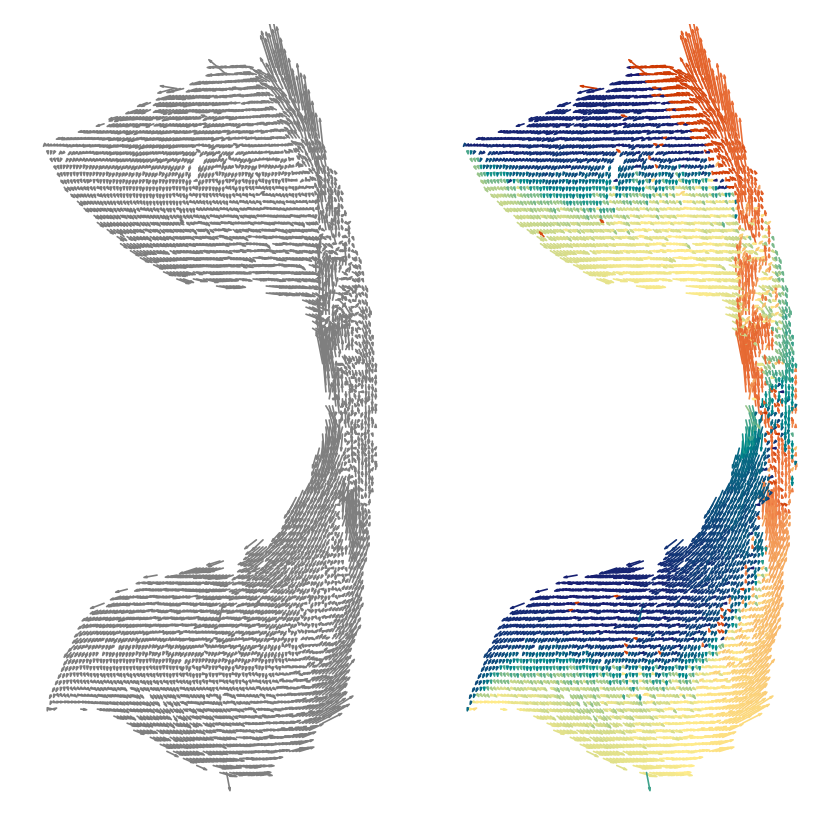

In [24]:
##Plot layout as vector field with more bins
par(mfrow = c(1,2), bty = 'n', xaxt = 'n', yaxt = 'n', mar = c(2,2,2,2))

#Non-theta (angle) colored
plot_vector_field(layout,
                  bin_umap = TRUE,
                  n_bins = 100)

#Theta colored
plot_vector_field(layout, 
                  color_by_theta = TRUE,
                  bin_umap = TRUE,
                  n_bins = 100)

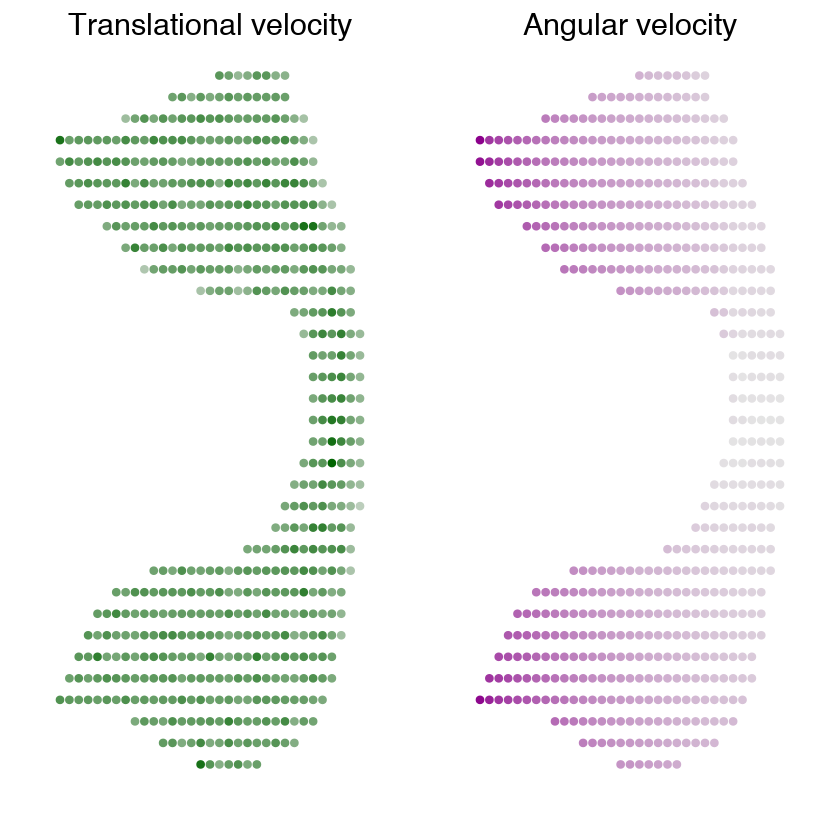

In [25]:
##Plot with features colored
#Bins
plot_umap_features(layout, 
                   windows,
                   feature_names = c('Translational velocity', 'Angular velocity'),
                   colors = c('darkgreen', 'darkmagenta'),
                   n_features = 2)

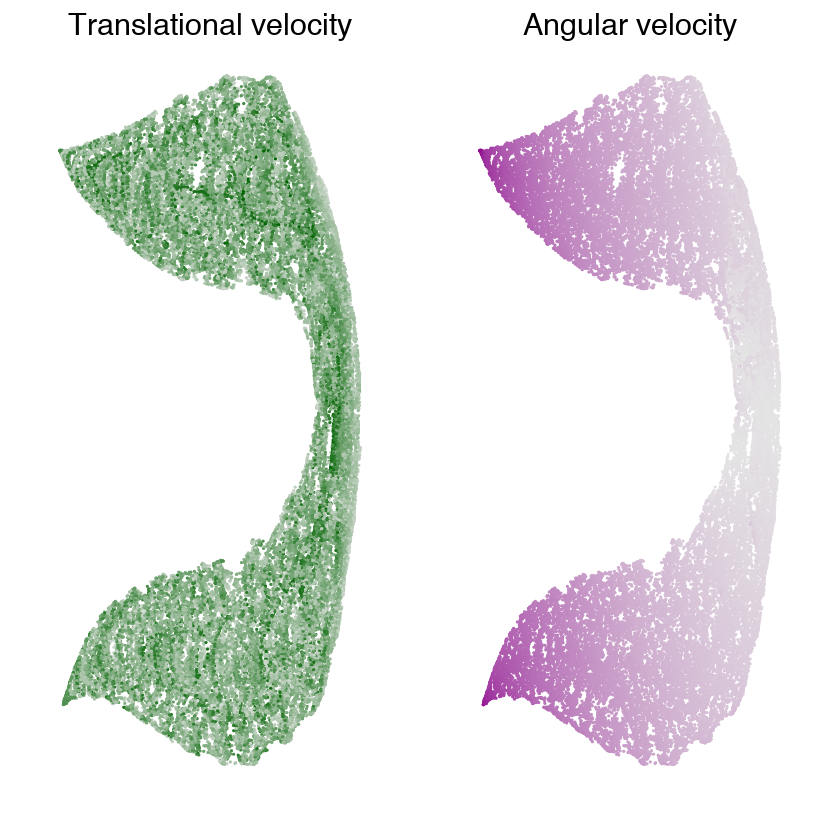

In [26]:
##Plot with features colored
#Points
plot_umap_features(layout, 
                   windows,
                   feature_names = c('Translational velocity', 'Angular velocity'),
                   plot_points = TRUE,
                   cex = 0.1,
                   colors = c('darkgreen', 'darkmagenta'),
                   n_features = 2)

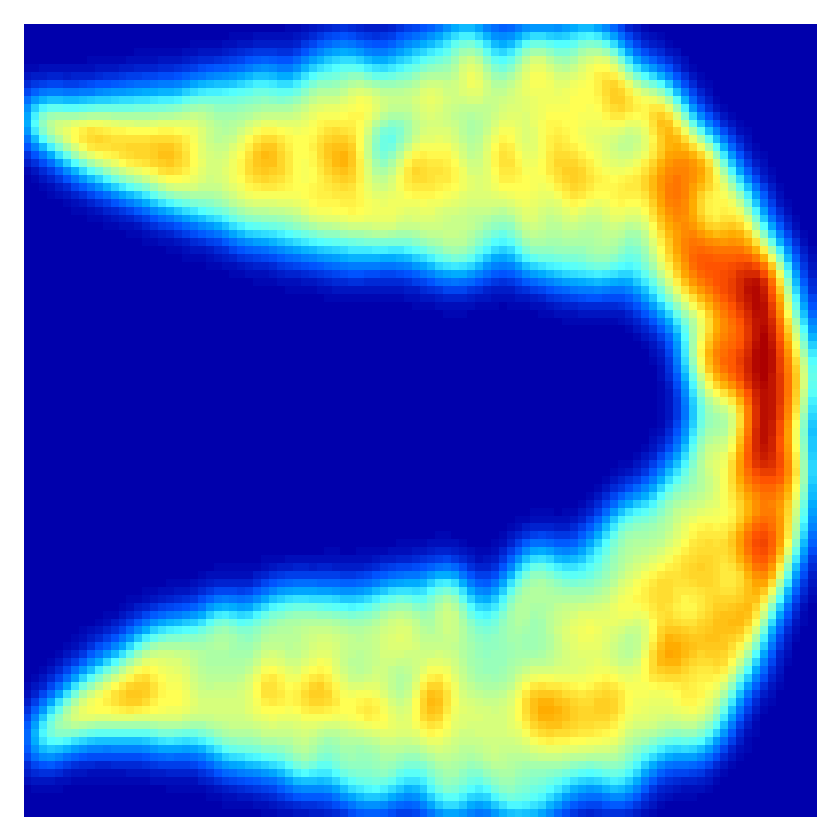

In [27]:
###########################################
#####Compare across individuals/trials#####
###########################################
#Visualize occupancy within the space via a probability density function (pdf), producing a 'density map'
plot_umap_pdf(layout, h = 2)

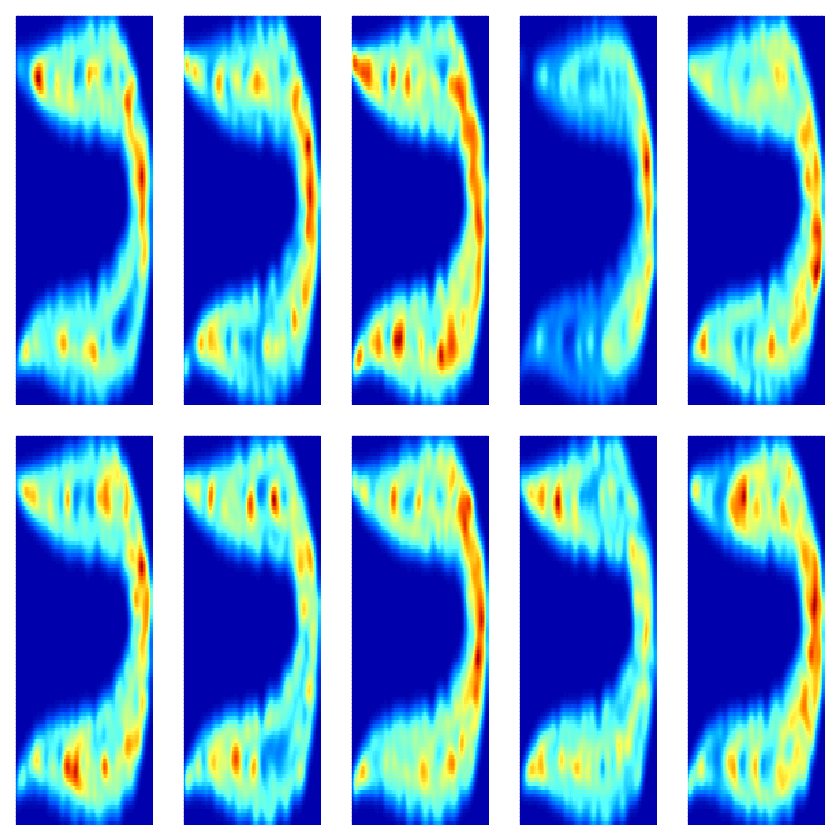

In [28]:
#Plot individual pdfs
par(mfrow = c(2,5))
inds = split(layout, layout$individual)
pdfs = list()
for(i in 1:length(inds)){
  pdfs[[names(inds)[i]]] = plot_umap_pdf(inds[[i]], 
                                         h = 2,
                                         return = TRUE)
}

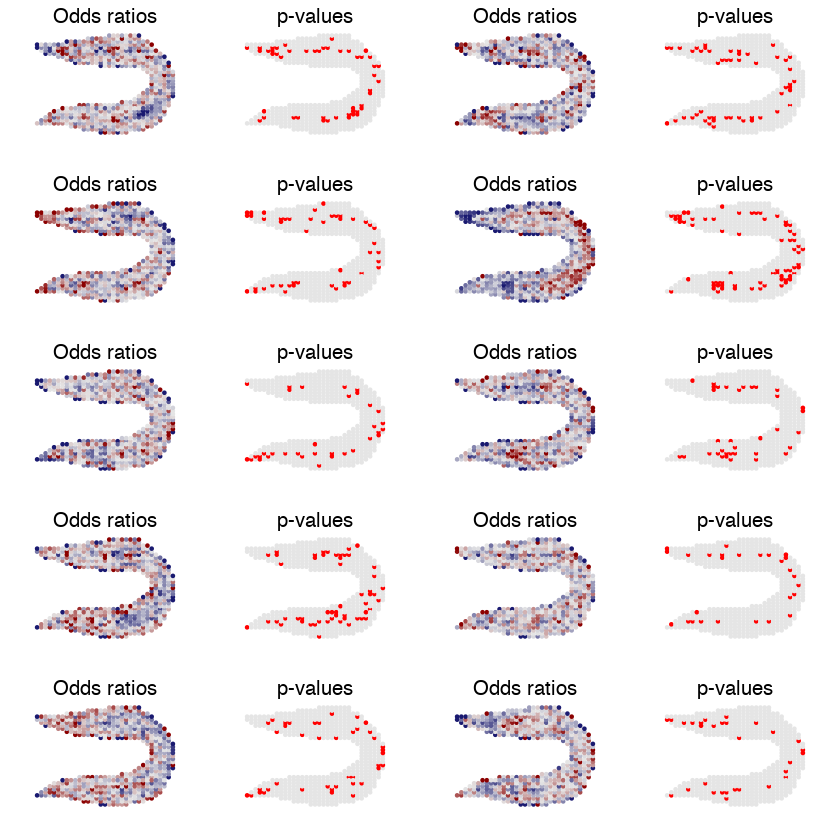

In [29]:
#Compare individual's distributions in space via Fisher's test
run_umap_fishers(layout,
                 layout$individual)

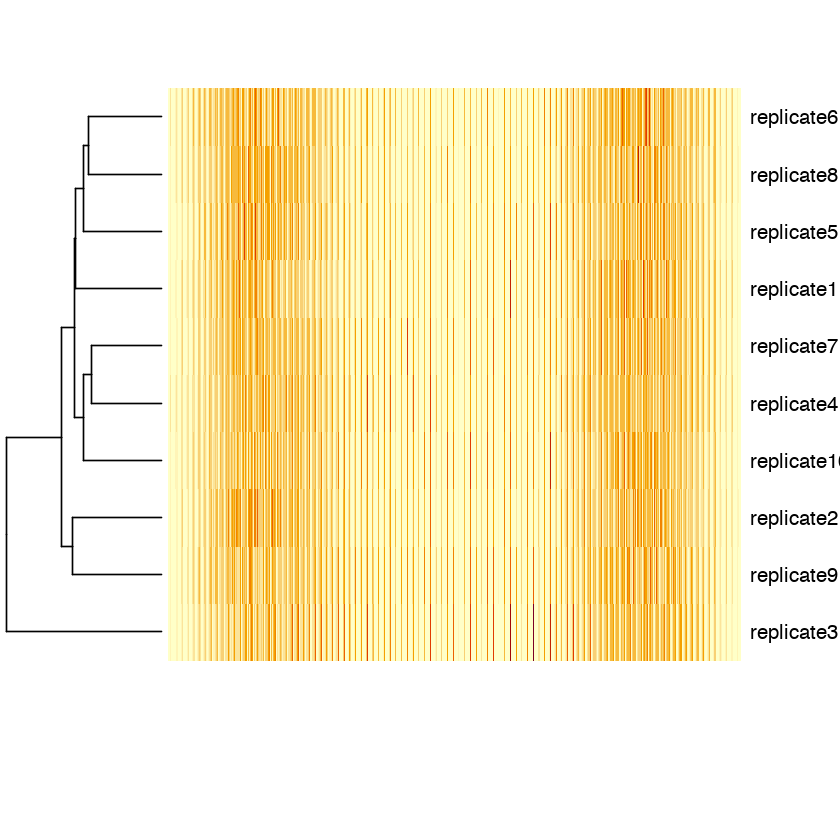

In [30]:
##Hierarchical clustering on density maps
#Unlist density maps and combine into a dataframe
p = do.call(cbind, lapply(pdfs, function(x) unlist(as.data.frame(x$z))))

#Normalize
p = apply(p, 2, function(x) x/max(x))

#Heatmap with hierarchical clustering
heatmap(t(p), 
        Colv = NA,
        labCol = '')